# Bag-of-Words Model | Bachelor's Project
This file covers how our Bag-of-Words baseline classifier was constructed and fine-tuned for the task of classifying real and synthetic news

## Setup (Load & Install Packages)

In [ ]:
# load packages (pre-installed in colab)
import pandas as pd
import numpy as np
import collections

In [ ]:
import nltk
nltk.download("popular", quiet=True)

True

## Data Preprocesing (Import & Clean)

#### Import Data

In [ ]:
#mount google drive (if run from google colab)
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/000 bachelor-project/data/labelled_data_for_classifier.csv")
test_data = pd.read_csv("/content/drive/MyDrive/000 bachelor-project/data/test_data_classifier.csv")

#select relevant columns
test_data = test_data[["text", "label"]]

In [ ]:
#create column to indicate source of data
train_data["test_train"] = "train"
test_data["test_train"] = "test"

In [ ]:
#combine train and test data 
data = pd.concat([train_data, test_data], ignore_index=True)

#### Inspect Data

In [ ]:
data.loc[data['test_train'] == "train"]

,text,label,test_train
0,Elena Smith er 71 år og aktivist. Da hun var y...,1,train
1,Med sine advokater på hver sin side har den ti...,1,train
2,"Det var med rystende hænder og tårer i øjnene,...",1,train
3,"Høje brændstofpriser, uro i verden og manglend...",1,train
4,Siden 1990 har man i Danmark kun benyttet sig ...,1,train
...,...,...,...
1213,Ifølge avisen har to tredjedele af skolens 123...,1,train
1214,"Det er ifølge Lars Bo Langsted, professor ved ...",1,train
1215,Det skriver Ekstra Bladet onsdag. Nye tal fra ...,1,train
1216,"De fleste af dem er nu anholdt igen, og er bra...",1,train


In [ ]:
data.loc[data['test_train'] == "test"]

,text,label,test_train
1218,Fra søndag morgen er det ikke længere muligt a...,1,test
1219,Der er planer om at opføre et stort antal enor...,1,test
1220,Et stort udbrud af salmonella med tre døde og ...,1,test
1221,Mange danskere har på et eller andet tidspunkt...,1,test
1222,"Med krøllet hår, højhælede støvler og et Gucci...",1,test
...,...,...,...
1309,Hvert år dør omkring 1000 danskere af hjertest...,0,test
1310,Torsdag aften var der demonstration foran den ...,0,test
1311,Kommunernes tandlæger skal tilbyde gratis tand...,0,test
1312,Tre personer er blevet kørt på skadestuen efte...,0,test


#### Clean dataset for bag-of-words 
(remove punctuations, make lowercase)

In [ ]:
#remove punctuations
data["text"] = data["text"].str.replace(r'[^\w\s]+', '')

#make lower case
data["text"] = data["text"].str.lower()

<ipython-input-58-11a95a596d0f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data["text"] = data["text"].str.replace(r'[^\w\s]+', '')


## Creating Bag-of-Words-Representations

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(lowercase=False) #lowercase = False ensures that the function does not lowercase it as they are already lowercased. 

X = vectorizer.fit_transform(data['text']).toarray()

Y = data["label"].values

In [ ]:
X_train = X[:1218]
X_test = X[1218:]
Y_train = Y[:1218]
Y_test = Y[1218:]

## Logistic Regression

#### Fitting the model

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", C=10, random_state=10, max_iter=250)
lr.fit(X_train, Y_train)

LogisticRegression(C=10, max_iter=250, random_state=10)

#### Predictions

In [ ]:
Y_predict = lr.predict(X_test)
Y_predict

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0])

#### Metrics (Accuracy, F1, Precision, Recall)

In [ ]:
from sklearn import metrics
# Use metrics.accuracy_score to measure the score
print("BOW Accuracy %.3f" %metrics.accuracy_score(Y_test, Y_predict))
print("BOW F1 %.3f" %metrics.f1_score(Y_test, Y_predict))
print("BOW Precision %.3f" %metrics.precision_score(Y_test, Y_predict))
print("BOW Recall %.3f" %metrics.recall_score(Y_test, Y_predict))

BOW Accuracy 0.802
BOW F1 0.796
BOW Precision 0.822
BOW Recall 0.771


#### Confusion Matrix

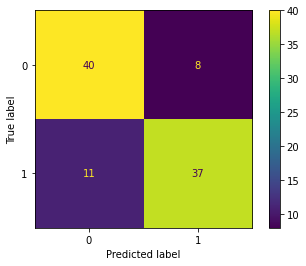

In [ ]:
cm = metrics.confusion_matrix(Y_test, Y_predict, labels=lr.classes_)

import matplotlib.pyplot as plt
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()
plt.show()

In [ ]:
print(cm/np.sum(cm, axis=1).reshape(-1,1)) #confusion matrix in probabilities

[[0.83333333 0.16666667]
 [0.22916667 0.77083333]]


#### Probabilities

In [ ]:
np.set_printoptions(suppress=True)
probabilities = lr.predict_proba(X_test)

#### Saving Predictions to Dataset

In [ ]:
test_data["prediction_bow"] = Y_predict

In [ ]:
Y_probability = [max(probabilities[i]) for i in range(len(probabilities))]
test_data["probability_bow"] = Y_probability

In [ ]:
test_data.to_csv("bow_predictions.csv")